# Q&A
What is your undergraduate GPA, both overall and for your major?
- undergraduate GPA: 3.894/4.0
- double majors in Quantitative Econ and Math. Major GPA is not listed on Official Transcript.

What are the scores for your undergraduate standardized tests (eg. SAT) and graduate standardized tests (eg. GRE)? 
- SAT: sorry I cannot recall precisely.
- GRE(330+3): verbal(161) + quantitaive(169) + writing(3)

What are you looking for in your next role? (Please keep responses to 50 words or less)
- Starting with any kind of data-related position, I am training myself to be a data expert in financial industry.
- In doing so, I want to get more hands-on experience in both data analysis techniques and how to use techs to influence financial investment decisions.
- Therefore, ideally my next role is a Senior Data Specialist who can extract alpha from the tons of alternative datasets.

What job do you see yourself having in 10 years? (Please keep responses to 50 words or less)
- Following the motivation I mentioned above, my interest is in Data Science in Finance.
- Therefore, I see myself as a Data Scientist in 10 years or less. She will be someone who keeps embracing new techniques and new types of alternative data, and is capable of making the "Right" data-driven decisions for clients like top hedge funds.

# Abstract
### 1q15 profit estimate
- $ 1516702.89

### My work includes:
- Read Raw Data
- Data Aggregation & Missing Value Detection
    - I found some correlation among three serieses.
    - Boats have some potential missing values.
    - For structurally missing and missing at random, I proposed different solutions.
- Outlier Detection & Anomalies Removement
    - I used two detectors: box-plot-like IQR, and a multi-variate dectector 
    - Determining whether to delete is a challenge. In short, avoiding huge loss of information, I only delete 2 extremes.
- Data Imputation & Validation
    - There are so many ways to fill the missing. Without enough information and withour a large dataset, I tries many imputors.
    - I compared imputors by Cross Validation.
- Profit Modeling & Predicting
    - After cleaning the daily revenues, I got my estimated quarter revenues for 3 websites.
    - Then, I modeled profit for three websites seperately using Linear Regression.
    - Trained 3 models and made predictions on my estimated revenues.
    - Sum up! Boom-ya! Done.
- Conclusion
    - Further improvements and concerns are highlighted under this section!

### Any data irregularities? 
- Yes! So many to take care. All are included in my .pynb file.

-----------------------
# YipitData Go.com Assignment
- Zhilin Liu
- zhilin.liu@nyu.edu
- Apr.10, 2021

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Background: 
- Assume that go.com is a fictional publicly traded ecommerce company that sells goods across three websites:
    - cars.go.com(which sells cars),
    - boats.go.com(which sells boats), and
    - planes.go.com(which sells planes).
- Assume it is April 2015 and Go.com is about to report their financial results for their most recent quarter (1Q15, ended on March 31, 2015).
- Assume that by collecting data from Go.com's three websites, we've been able to come up with very accurate estimates for what Go.com will report for 1q15 revenue.

### Data Description:
- Format: Excel Worksheets
- Content:
    - a) the daily revenue data collected from Go.com’s three websites for 1Q15 
        - "sales data" tab, 
        -  each row represents total revenue earned by a particular site for that day
    - b) the company reported data for the last five quarters 
        - "historical data" tab,
        - for both "revenue" and "profit" 

### Goal:
We want to come up with an estimate for what Go.com will report as their 1q15 profit. In this notebook, I will cover my 1Q15 profit estimate and a short description of how I arrived there. 
***Note: comment on any data irregularities that I find.***

--------------------
## My work includes:
- Read Raw Data
- Data Aggregation & Missing Value Detection
- Outlier Detection & Anomalies Removement
- Data Imputation & Validation
- Profit Modeling & Predicting
- Conclusion

### I. Read Raw Data:
- `sales`: Excel worksheet "sales data"
- `revenue`: Excel worksheet "historical data" - "Revenue"
- `profit`: Excel worksheet "historical data" - "Profit"
- `cost`: Excel worksheet "historical data" - "Revenue"-"Profit"

In [2]:
import pandas as pd 
pd.set_option("display.precision", 2)
#pd.options.display.float_format = "{:,.2f}".format
filepath = r'YipitData_Go\Go.com_Assignment_Data_-.xlsx'
sales = pd.read_excel(filepath, header=4,usecols=[1,2,3]).set_index('Date')
sales.head()

,Revenue,Product Line
Date,,
2015-01-01,108632.40,Cars.go.com
2015-01-01,31494.01,Planes.go.com
2015-01-01,239376.48,Boats.go.com
2015-01-02,552064.80,Cars.go.com
2015-01-02,238344.12,Planes.go.com


In [3]:
revenue = pd.read_excel(filepath,sheet_name=1,header=5,usecols=[1,2,3,4,5,6], skiprows=[6], skipfooter=7).rename(columns = {'Unnamed: 1':'Revenue'}).set_index("Revenue").astype('float64')
revenue

,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014
Revenue,,,,,
Cars.go.com,6.09e+06,5.66e+06,5.70e+06,5.69e+06,5.91e+06
Planes.go.com,3.23e+07,3.49e+07,3.60e+07,3.44e+07,4.53e+07
Boats.go.com,4.33e+06,4.42e+06,4.66e+06,4.60e+06,5.44e+06
Total,4.28e+07,4.49e+07,4.64e+07,4.47e+07,5.67e+07


In [4]:
profit = pd.read_excel(filepath,sheet_name=1,header=5,usecols=[1,2,3,4,5,6], skiprows=[i for i in range(6,14)]).rename(columns = {'Unnamed: 1':'Profit'}).set_index("Profit")
profit

,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014
Profit,,,,,
Cars.go.com,1.22e+06,1.13e+06,1.14e+06,1.14e+06,1.18e+06
Planes.go.com,1.62e+05,1.74e+05,1.80e+05,1.72e+05,2.27e+05
Boats.go.com,8.66e+04,8.84e+04,9.31e+04,9.20e+04,1.09e+05
Total,1.47e+06,1.40e+06,1.41e+06,1.40e+06,1.52e+06


In [5]:
cost = revenue - profit
cost = cost.rename_axis("Cost")
cost

,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014
Cost,,,,,
Cars.go.com,4.87e+06,4.53e+06,4.56e+06,4.55e+06,4.73e+06
Planes.go.com,3.22e+07,3.47e+07,3.59e+07,3.43e+07,4.51e+07
Boats.go.com,4.24e+06,4.33e+06,4.56e+06,4.51e+06,5.33e+06
Total,4.13e+07,4.35e+07,4.50e+07,4.33e+07,5.52e+07


### II. Data Aggregation & Missing Value Detection:
I have this step of aggregation for 2 reasons:
- Even though we cannot see any obvious missing values by calling `isnull`, **there are**! 
    - number of dates are 90; number of websites are 3
    - ideally if there were nothing missing, we should have 270 rows assuming there are no "business closed" days.
    - BUT, we only got 256 rows. 
- Also notice that the revenue of go.com are from three websites, therefore it is reasonable for us to explore the data seperately. 

#### II.A) Missing Value Detection:

In [6]:
# simple check
sales.isnull().values.any()

False

In [7]:
# detailed check
print(f"Q1 2015: {31+28+31} days")
print(f"unique dates from excel: {len(set(sales.index.values))}")
print(f"data_sales:{sales.shape}")
print(f"num of websites: {3}")

Q1 2015: 90 days
unique dates from excel: 90
data_sales:(256, 2)
num of websites: 3


#### II.B) Data Re-aggregation:

In [8]:
cars = sales[sales["Product Line"]=="Cars.go.com"][["Revenue"]]
planes = sales[sales["Product Line"]=="Planes.go.com"][["Revenue"]]
boats = sales[sales["Product Line"]=="Boats.go.com"][["Revenue"]]
print(f"Cars: {cars.shape[0]} days")
print(f"Planes: {planes.shape[0]} days")
print(f"Boats: {boats.shape[0]} days")

Cars: 90 days
Planes: 90 days
Boats: 76 days


**All the missings came from "Boats".**

Now perform data aggregation:

In [9]:
print(f'sales Before:{sales.shape}')
sales = cars.join(planes, lsuffix='_Cars', rsuffix='_Planes').join(boats, rsuffix='_Boats').rename(columns={'Revenue_Cars':'Cars','Revenue_Planes':'Planes','Revenue':'Boats'})
print(f'sales After:{sales.shape}')
sales

sales Before:(256, 2)
sales After:(90, 3)


,Cars,Planes,Boats
Date,,,
2015-01-01,108632.4,31494.01,239376.48
2015-01-02,552064.8,238344.12,37594.56
2015-01-03,334413.6,51614.01,24042.72
2015-01-04,320344.8,156188.65,25352.64
2015-01-05,170732.4,230108.45,627.84
...,...,...,...
2015-03-27,450775.2,6999.61,25699.68
2015-03-28,68239.2,154907.24,32183.52
2015-03-29,303039.6,127322.68,259.68


Let's see what are missing?

In [10]:
print(f"Sale data is from {str(sales.index.values[0])[:10]} to {str(sales.index.values[-1])[:10]}")
sales[sales.isna().any(axis=1)]

Sale data is from 2015-01-01 to 2015-03-31


,Cars,Planes,Boats
Date,,,
2015-02-07,77977.2,5.34e+05,NaN
2015-02-08,535593.6,3.79e+05,NaN
2015-02-09,80180.4,2.16e+05,NaN
2015-02-10,121536.0,2.78e+05,NaN
2015-02-11,116959.2,2.43e+05,NaN
2015-02-12,143286.0,7.23e+05,NaN
2015-02-13,544267.2,5.28e+04,NaN
2015-02-14,106639.2,1.12e+04,NaN
2015-02-15,31240.8,7.79e+04,NaN


In [11]:
print(f"There are {sales[sales.isna().any(axis=1)].shape[0]} days missing.")
print(f"It is about {sales[sales.isna().any(axis=1)].shape[0]/90*100:.2f}%.")

There are 14 days missing.
It is about 15.56%.


#### II.C) Dealing with missing value:
We have no sales data for boat from 2015-02-07 to 2015-02-20. It is about 16% of the 90 days and most importantly these missing values came as a block, i.e. they are successive. 

Potential Reasons & How to address:
- Case One) Structurally missing: 
    - just no data should be there. 
    - e.g. "business closed" days with no revenue
    - Address: 
        - 1) Compare 1Q 2015 Total Revenue with historical quarterly revenues for boat. Whether there is a gap?
        - 2) Further confirmation need to be done with either data providers or the company.
- Case Two) Missing at random: 
    - e.g. "mistakes when collecting", 
    - Address: after deleting all the outliers, we can use standard data imputation/prediction techs to fill them out together.

Before further steps, we want to keep in mind the following relationship:
- The correlation between planes and boats is really high in terms of quarter revenue, profit and hence cost.
- This might be an important metric for us to evaluate our imputation/predictions.

In [12]:
sales.corr()

,Cars,Planes,Boats
Cars,1.00,-0.05,0.06
Planes,-0.05,1.00,0.33
Boats,0.06,0.33,1.00


In [13]:
revenue.iloc[:3].T.corr()

Revenue,Cars.go.com,Planes.go.com,Boats.go.com
Revenue,,,
Cars.go.com,1.00,0.07,0.08
Planes.go.com,0.07,1.00,0.98
Boats.go.com,0.08,0.98,1.00


In [14]:
profit.iloc[:3].T.corr()

Profit,Cars.go.com,Planes.go.com,Boats.go.com
Profit,,,
Cars.go.com,1.00,0.07,0.08
Planes.go.com,0.07,1.00,0.98
Boats.go.com,0.08,0.98,1.00


In [15]:
cost.iloc[:3].T.corr()

Cost,Cars.go.com,Planes.go.com,Boats.go.com
Cost,,,
Cars.go.com,1.00,0.07,0.08
Planes.go.com,0.07,1.00,0.98
Boats.go.com,0.08,0.98,1.00


#### Case one: Structually Missing
Assuming structural missing, we are not going to fill the missing position.

let us compare 1Q 2015 total revenue with historical ones:

In [16]:
revenue_temp = revenue.copy(deep=True)
revenue_temp["Q1 2015"] = np.append(sales.sum().values, sales.sum().sum())
revenue_temp

,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014,Q1 2015
Revenue,,,,,,
Cars.go.com,6.09e+06,5.66e+06,5.70e+06,5.69e+06,5.91e+06,1.68e+07
Planes.go.com,3.23e+07,3.49e+07,3.60e+07,3.44e+07,4.53e+07,3.25e+07
Boats.go.com,4.33e+06,4.42e+06,4.66e+06,4.60e+06,5.44e+06,4.74e+06
Total,4.28e+07,4.49e+07,4.64e+07,4.47e+07,5.67e+07,5.40e+07


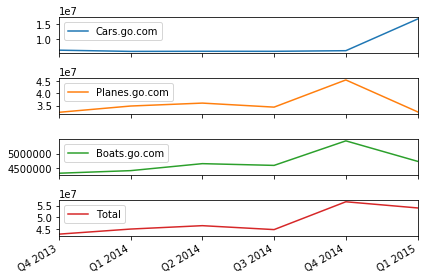

In [17]:
revenue_temp.T.plot(subplots=True)
plt.tight_layout()
plt.show()

Under Case One assumption, without filling out missing values, 1Q 2015 boat revenue is still reasonable in a normal range. 

Also, let's see the correlation:

In [18]:
print("Historical Revenue Corr:")
print(revenue.iloc[:3].T.corr())
print("\nCase One Revenue Corr:")
print(revenue_temp.iloc[:3].T.corr())

Historical Revenue Corr:
Revenue        Cars.go.com  Planes.go.com  Boats.go.com
Revenue                                                
Cars.go.com           1.00           0.07          0.08
Planes.go.com         0.07           1.00          0.98
Boats.go.com          0.08           0.98          1.00

Case One Revenue Corr:
Revenue        Cars.go.com  Planes.go.com  Boats.go.com
Revenue                                                
Cars.go.com           1.00          -0.34          0.05
Planes.go.com        -0.34           1.00          0.91
Boats.go.com          0.05           0.91          1.00


The correlation among three revenue series are somehow preserved.

Above all, we can consider them as stucturally missing. No need for imputation.

Or, let's call the data provider!

#### Case Two: Missing at Random
Under this assumption, we want to 
- keep those NaNs, and 
- detect outliers and determine which of them are anomalies to delete first, so that we do not allow anomalies to affect our missing positions.
- Then, we use imputation techs to fill all of the missing positions. 
- Finally, validate the imputation results.

### III. Outlier Detection & Anomalies Removement:
#### III.A) Outlier Detection
Two Approaches:
- Rule-based: by simply visualization and statistical/ts analysis
- Data Modeling: detect with more complex models to identify hidden patterns

Normally for a very large time series dataset, I will dedicate with some Python packages, such as Anomaly Detection Toolkit (ADTK) and Scikit Learn (sklearn), with which more complex time series models and machine learning techniques are used to detect anomalies. 

In this assignment, however, our data is small enough so that it can be handeled with rule-based anomaly detection.

#### 1st Detector: Box-plot

In [19]:
sales.describe()

,Cars,Planes,Boats
count,90.00,9.00e+01,76.00
mean,186194.72,3.61e+05,62320.36
std,158793.62,3.51e+05,67050.57
min,3790.80,7.00e+03,251.04
25%,75800.40,1.19e+05,21141.36
50%,111863.40,2.14e+05,36744.72
75%,285843.60,6.05e+05,59522.28
max,571988.40,1.40e+06,239376.48


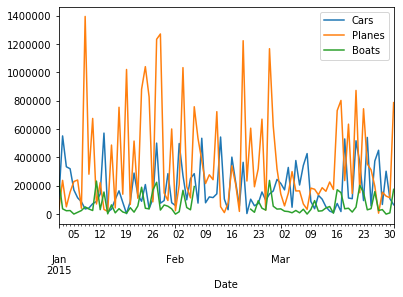

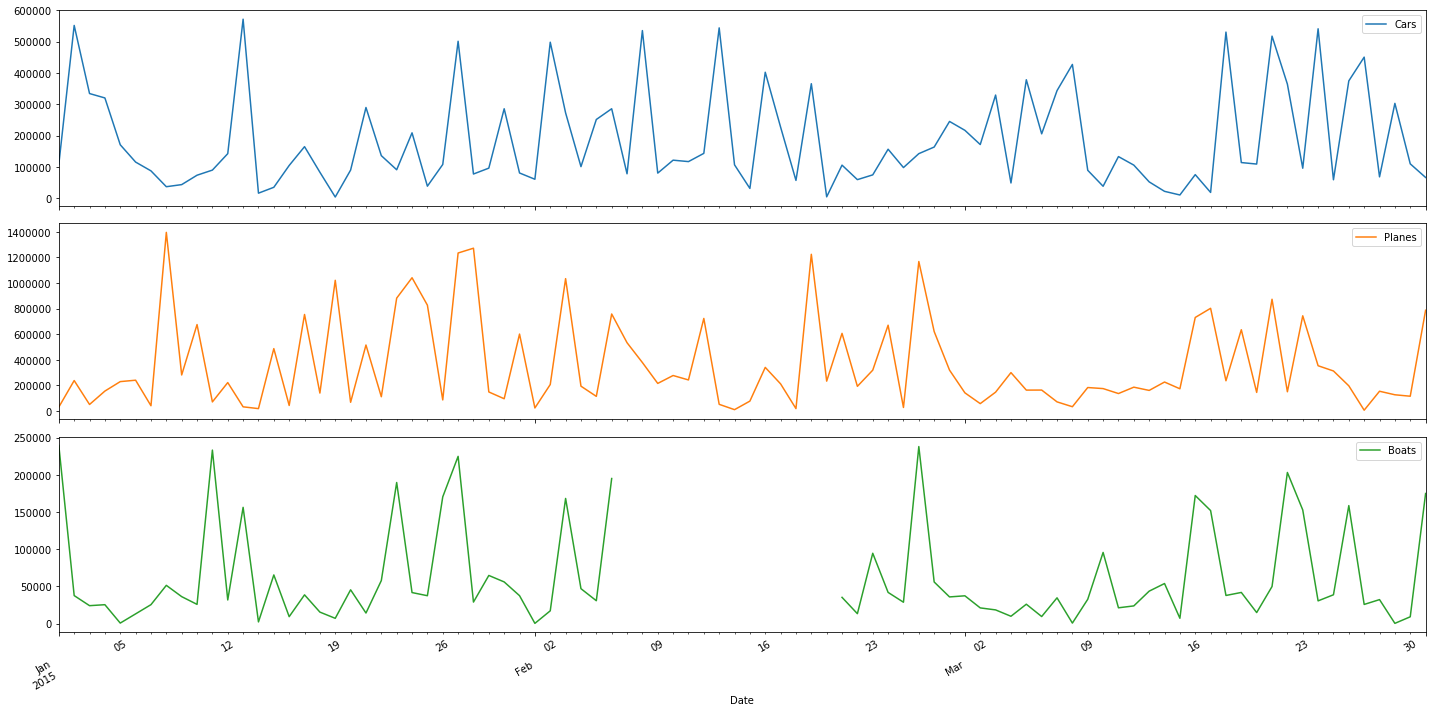

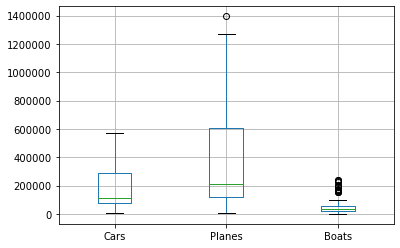

In [20]:
# curves together
sales.plot()
plt.show()
# curves
sales.plot(subplots=True, figsize=(20,10))
plt.tight_layout()
plt.show()
# box plot
sales.boxplot()
plt.show()

Findings:
- Three revenue curves have partterns that are very different with each other.
- We don't detect any obvious outliers from the curve plots.
- Boxplot: If we define outliers as those are out of the range of $[Q1−c×IQR, Q3+c×IQR]$ where $IQR=Q3−Q1$ is the difference between 25% and 75% quantiles, when $c=1.5$. There are obvious outliers that are noted as dots.
- However, when tring to delete data points, we do not want to lose too much information. At least, we have to keep 80% data, or having no more than 18 missing values after deletion. With this in mind, I chose $c=4$.

Let's visualize them:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDE55974A8>,
      dtype=object)

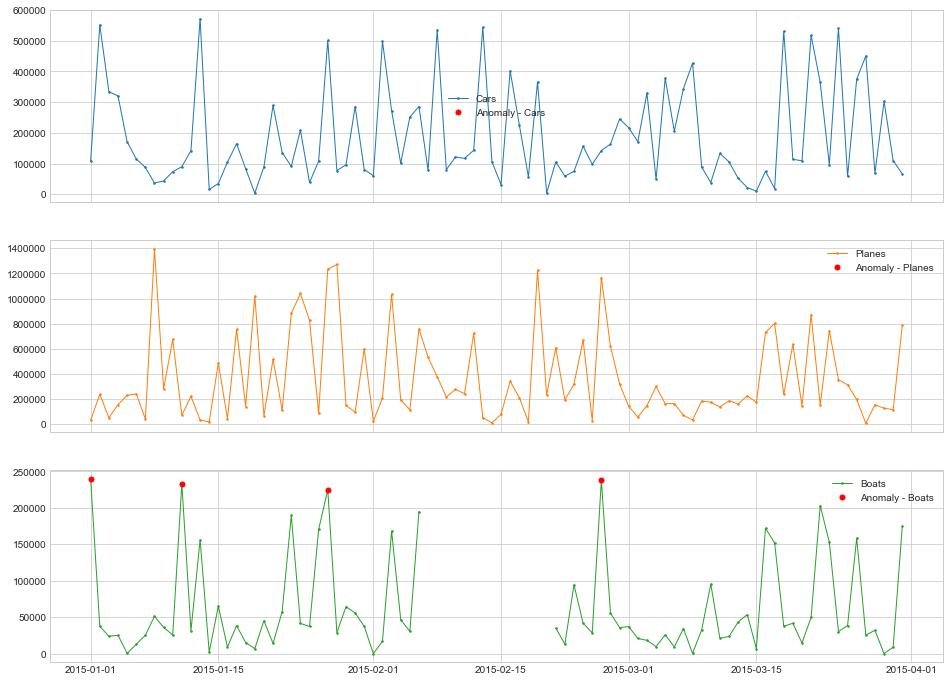

In [21]:
from adtk.detector import InterQuartileRangeAD
dtr1 = InterQuartileRangeAD(c=4)
anomalies1 = dtr1.fit_detect(sales)

# visualization
from adtk.visualization import plot
plot(sales, anomaly=anomalies1, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")

Resulting outliers:
- Cars: None
- Planes: None
- Boats: 4

In [22]:
anomalies1.replace(to_replace = {1: True, 0: False}, inplace=True)
anomalies1[anomalies1.values==True].Boats

Date
2015-01-01    True
2015-01-11    True
2015-01-27    True
2015-02-26    True
Name: Boats, dtype: object

#### 2nd Detector: Multi-variate
Take account of the correlation among three series. 

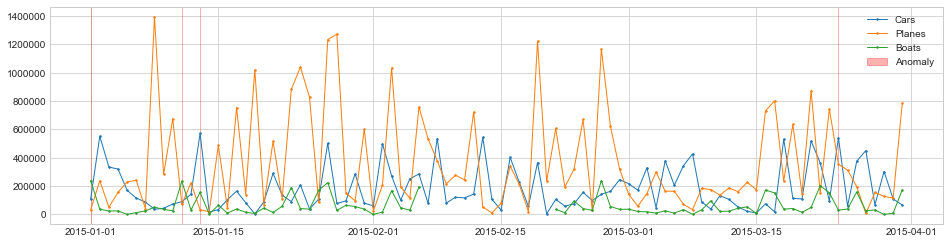

In [23]:
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor
dtr2 = OutlierDetector(LocalOutlierFactor(contamination=0.05))
anomalies2 = dtr2.fit_detect(sales)
plot(sales, anomaly=anomalies2, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

In [24]:
anomalies2.replace(to_replace = {1: True, 0: False}, inplace=True)
anomalies2[anomalies2.values==True]

Date
2015-01-01    True
2015-01-11    True
2015-01-13    True
2015-03-24    True
dtype: object

Decision:

Combining the results from two anomality detectors above, I determined to delete those that are identified as outliers by both of these two detectors, and ignore the rest.

So we have to delete:

**Boats:**

|Date|Anomality|
|----------|----|
|2015-01-01|True|
|2015-01-11|True|

#### III.B) Anomalies Removement

In [25]:
sales_cleaned = sales.copy(deep=True)
sales_cleaned.Boats['2015-01-01'] = np.NaN
sales_cleaned.Boats['2015-01-11'] = np.NaN
print(f"After deleting, the numbers of NaN:\n{sales_cleaned.isnull().sum()}")
sales_cleaned.head()

After deleting, the numbers of NaN:
Cars       0
Planes     0
Boats     16
dtype: int64


,Cars,Planes,Boats
Date,,,
2015-01-01,108632.4,31494.01,NaN
2015-01-02,552064.8,238344.12,37594.56
2015-01-03,334413.6,51614.01,24042.72
2015-01-04,320344.8,156188.65,25352.64
2015-01-05,170732.4,230108.45,627.84


### IV. Data Imputation & Validation:

#### IV.A) Data Imputation
For this part, we considered three categories of imputation techniques:

* simple imputation techniques such as filling missing positions with the mean over some rolling window
* use classical time series models such as ARIMA to perform prediction for each time series
* apply more advanced Machine Learning or Neural Network to train and fill

Again, we are now working on a limited-length dataset, so time series models and ML/NNs are too complex to give a reasonable and accurate result. Consequently, we examime several simple imputation techniques.



#### IV. Validation

Q: Whether we are correctly imputing the data? How to compare imputers?

A: Imputation performance measure:

For each imputor, we design a 5-fold Cross Validation. For each cv round, 
- Randomly delete extra 10% data, and 
- `y_hat`:
    - impute everything including the data that are artificially deleted
- `y`:
    - original dataset that has been cleaned 
- Get the error between `y_hat` and `y`, this would be the performance score for this cv round.
  
Then, take average over 5 scores to estimate that imputor's performance.

Compare imputors with final results.

#### IV.A) Random Deletion

In [26]:
sales.isnull().sum()

Cars       0
Planes     0
Boats     14
dtype: int64

In [27]:
import random, math
def delector(pct: float):
    # copy
    cars_deleted = cars.copy(deep=True)
    planes_deleted = planes.copy(deep=True)
    boats_deleted = boats.copy(deep=True)
    sales_deleted_temp = sales.copy(deep=True)

    # deleting Cars
    n_deleting = int(90*pct)
    idx_deleting = random.sample(range(1, 89), n_deleting)
    date_deleting = cars_deleted.iloc[idx_deleting].index
    cars_deleted.Revenue[idx_deleting] = [np.NaN]*n_deleting
    # deleting Planes
    idx_deleting = random.sample(range(1, 89), n_deleting)
    date_deleting = planes_deleted.iloc[idx_deleting].index
    planes_deleted.Revenue[idx_deleting] = [np.NaN]*n_deleting
    # deleting Boats
    n_deleting = math.floor(76*pct)
    idx_deleting = random.sample(range(1, 75), n_deleting)
    date_deleting = boats_deleted.iloc[idx_deleting].index
    boats_deleted.Revenue[idx_deleting] = [np.NaN]*n_deleting

    # output dataframe
    sales_deleted = sales_deleted_temp.join(cars_deleted, rsuffix='_Cars').join(planes_deleted, rsuffix='_Planes').join(boats_deleted, rsuffix='_Boats')[['Revenue','Revenue_Planes','Revenue_Boats']].rename(columns={'Revenue':'Cars','Revenue_Planes':'Planes','Revenue_Boats':'Boats'})

    return sales_deleted

#### IV.B) Error Metric
I chose mean absolute percentage error (MAPE) as our error metric, for it is scale independent.

In [63]:
def MAPE(y_df: pd.DataFrame, y_hat_df: pd.DataFrame) -> float:
    """
    :param y_df: actual test data
    :param y_hat_df: predicted values
    :return: the MAPE of actual data and predicted data
    """
    pct_df =  np.abs(y_df - y_hat_df)/ np.abs(y_df)
    MAPE = pct_df.stack().mean()
    return MAPE

#### IV.C) Cross Validation

In [64]:
# various imputation methods
def rolling_mean(df):
    df_imputed = df.assign(Cars=df.Cars.fillna(df.Cars.rolling(14,min_periods=1,).mean())).assign(Planes=df.Planes.fillna(df.Planes.rolling(7,min_periods=1,).mean())).assign(Boats=df.Boats.fillna(df.Boats.rolling(7,min_periods=1,).mean()))
    return df_imputed

def rolling_median(df):
    df_imputed = df.assign(Cars=df.Cars.fillna(df.Cars.rolling(14,min_periods=1,).median())).assign(Planes=df.Planes.fillna(df.Planes.rolling(7,min_periods=1,).median())).assign(Boats=df.Boats.fillna(df.Boats.rolling(7,min_periods=1,).median()))
    return df_imputed

def interpolate_linear(df): 
    df_imputed = df.assign(Cars=df.Cars.interpolate(method='linear')).assign(Planes=df.Planes.interpolate(method='linear')).assign(Boats=df.Boats.interpolate(method='linear'))
    return df_imputed

def interpolate_time(df): 
    df_imputed = df.assign(Cars=df.Cars.interpolate(method='time')).assign(Planes=df.Planes.interpolate(method='time')).assign(Boats=df.Boats.interpolate(method='time'))
    return df_imputed

def interpolate_quadratic(df): 
    df_imputed = df.assign(Cars=df.Cars.interpolate(method='quadratic')).assign(Planes=df.Planes.interpolate(method='quadratic')).assign(Boats=df.Boats.interpolate(method='quadratic'))
    return df_imputed

def interpolate_cubic(df): 
    df_imputed = df.assign(Cars=df.Cars.interpolate(method='cubic')).assign(Planes=df.Planes.interpolate(method='cubic')).assign(Boats=df.Boats.interpolate(method='cubic'))
    return df_imputed

def interpolate_slinear(df): 
    df_imputed = df.assign(Cars=df.Cars.interpolate(method='slinear')).assign(Planes=df.Planes.interpolate(method='slinear')).assign(Boats=df.Boats.interpolate(method='slinear'))
    return df_imputed

def interpolate_akima(df): 
    df_imputed = df.assign(Cars=df.Cars.interpolate(method='akima')).assign(Planes=df.Planes.interpolate(method='akima')).assign(Boats=df.Boats.interpolate(method='akima'))
    return df_imputed

def polynomial_5(df): 
    df_imputed = df.assign(Cars=df.Cars.interpolate(method='polynomial', order=5)).assign(Planes=df.Planes.interpolate(method='polynomial', order=5)).assign(Boats=df.Boats.interpolate(method='polynomial', order=5))
    return df_imputed

def polynomial_7(df): 
    df_imputed = df.assign(Cars=df.Cars.interpolate(method='polynomial', order=7)).assign(Planes=df.Planes.interpolate(method='polynomial', order=7)).assign(Boats=df.Boats.interpolate(method='polynomial', order=7))
    return df_imputed

def spline_3(df): 
    df_imputed = df.assign(Cars=df.Cars.interpolate(method='spline', order=3)).assign(Planes=df.Planes.interpolate(method='spline', order=3)).assign(Boats=df.Boats.interpolate(method='spline', order=3))
    return df_imputed

def spline_4(df): 
    df_imputed = df.assign(Cars=df.Cars.interpolate(method='spline', order=4)).assign(Planes=df.Planes.interpolate(method='spline', order=4)).assign(Boats=df.Boats.interpolate(method='spline', order=4))
    return df_imputed

def spline_5(df): 
    df_imputed = df.assign(Cars=df.Cars.interpolate(method='spline', order=5)).assign(Planes=df.Planes.interpolate(method='spline', order=5)).assign(Boats=df.Boats.interpolate(method='spline', order=5))
    return df_imputed

from sklearn.impute import SimpleImputer
def simple_imputer(df):
    # print(df.shape)
    sim = SimpleImputer(missing_values=np.nan, strategy='mean')
    res_sim = sim.fit_transform(df.T).T
    # print(np.shape(res_sim))
    imputed_df = pd.DataFrame(res_sim, columns = df.columns, index = df.index)
    return imputed_df

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
def iterative_imputer(df):
    imp = IterativeImputer(max_iter=10, random_state=0)
    res_imp = imp.fit_transform(df.T).T
    imputed_df = pd.DataFrame(res_imp, columns = df.columns, index = df.index)
    return imputed_df

from sklearn.impute import KNNImputer
def Knn_imputer(df):
    knn = KNNImputer(n_neighbors=2, weights="uniform")
    res_knn = knn.fit_transform(df.T).T
    imputed_df = pd.DataFrame(res_knn, columns = df.columns, index = df.index)
    return imputed_df

def cross_validator(cv: int, method: str):
    error = np.zeros(cv)
    for i in range(cv):
        # randomly delete data
        deleted_df = delector(0.1)
        # run an imputation
        imputed_df = imputes[method](deleted_df) # impute data
        error[i] = MAPE(sales,imputed_df)
    return method, error.mean()

In [65]:
imputes = {"rolling_mean": rolling_mean,
            "rolling_median": rolling_median,
            "interpolate_linear": interpolate_linear,
            "interpolate_time": interpolate_time,
            "interpolate_quadratic": interpolate_quadratic,
            "interpolate_cubic": interpolate_cubic,
            "interpolate_slinear": interpolate_slinear,
            "interpolate_akima": interpolate_akima,
            "polynomial_5": polynomial_5,
            "polynomial_7": polynomial_7,
            "spline_3": spline_3,
            "spline_4": spline_4,
            "spline_5": spline_5,
            # "simple_imputer": simple_imputer,
            # "iterative_imputer": iterative_imputer,
            # "Knn_imputer": Knn_imputer
            }

In [66]:
performance_dic = {}
for k in list(imputes.keys()):
    mtd, pfm = cross_validator(5, k)
    performance_dic[mtd] = pfm
performance_df = pd.DataFrame.from_dict(performance_dic, orient='index').rename(columns={0:'CV_score'})
performance_df

,CV_score
rolling_mean,0.90
rolling_median,0.61
interpolate_linear,0.43
interpolate_time,0.54
interpolate_quadratic,0.36
interpolate_cubic,0.27
interpolate_slinear,0.53
interpolate_akima,0.44
polynomial_5,0.94
polynomial_7,0.44


In [67]:
optimal_imputor = performance_df[performance_df.values==performance_df.values.min()].index.values[0]
optimal_imputor

'interpolate_cubic'

Findings:
- ***Assuming*** there are anomalies and the missing values of Boats have to be imputed:
- `optimal_imputer` gives us the relative great imputation performance.
- Next, I will use it to fill the missing values, and calculate the revenue for 1Q 2015.

### V. Profit Modeling & Predicting

Milestone Summary:

We have organized the daily sales data and completely cleaned them with some certain assumptions.

Next comes to our final stage: predicting the profit for 1Q 2015.

#### V.A) Use optimal imputer to fill missing values:

In [68]:
sales_imputing = sales_cleaned.copy(deep=True)
sales_imputing = imputes[optimal_imputor](sales_imputing)
# print('After Imputation:\n',sales_imputing.isnull().sum())
# sales_imputing

After Imputation:
 Cars      0
Planes    0
Boats     1
dtype: int64


,Cars,Planes,Boats
Date,,,
2015-01-01,108632.4,31494.01,NaN
2015-01-02,552064.8,238344.12,37594.56
2015-01-03,334413.6,51614.01,24042.72
2015-01-04,320344.8,156188.65,25352.64
2015-01-05,170732.4,230108.45,627.84
...,...,...,...
2015-03-27,450775.2,6999.61,25699.68
2015-03-28,68239.2,154907.24,32183.52
2015-03-29,303039.6,127322.68,259.68


#### V.B) Obtain Revenue

In [69]:
revenue_all = revenue.copy(deep=True)
revenue_all['Q5 2015'] = list(sales_imputing.sum().values)+[sales_imputing.sum().sum()]
revenue_all

,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014,Q5 2015
Revenue,,,,,,
Cars.go.com,6.09e+06,5.66e+06,5.70e+06,5.69e+06,5.91e+06,1.68e+07
Planes.go.com,3.23e+07,3.49e+07,3.60e+07,3.44e+07,4.53e+07,3.25e+07
Boats.go.com,4.33e+06,4.42e+06,4.66e+06,4.60e+06,5.44e+06,1.05e+07
Total,4.28e+07,4.49e+07,4.64e+07,4.47e+07,5.67e+07,5.98e+07


In [70]:
profit

,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014
Profit,,,,,
Cars.go.com,1.22e+06,1.13e+06,1.14e+06,1.14e+06,1.18e+06
Planes.go.com,1.62e+05,1.74e+05,1.80e+05,1.72e+05,2.27e+05
Boats.go.com,8.66e+04,8.84e+04,9.31e+04,9.20e+04,1.09e+05
Total,1.47e+06,1.40e+06,1.41e+06,1.40e+06,1.52e+06


In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
# for Cars
y_car_train = profit.loc['Cars.go.com'].values.reshape(-1,1)
X_car_train = revenue.loc['Cars.go.com'].values[:5].reshape(-1,1)
X_car_test = revenue.loc['Cars.go.com'].values[-1].reshape(-1,1)
reg = LinearRegression().fit(X_car_train, y_car_train)
car_2015 = reg.predict(X_car_test).item()
print(f"Model: Profit = {reg.coef_[0][0]:.2f} * Revenue + {reg.intercept_[0]}")

Model: Profit = 0.20 * Revenue + -9.313225746154785e-10


In [73]:
# for Planes
y_plane_train = profit.loc['Planes.go.com'].values.reshape(-1,1)
X_plane_train = revenue.loc['Planes.go.com'].values[:5].reshape(-1,1)
X_plane_test = revenue.loc['Planes.go.com'].values[-1].reshape(-1,1)
reg = LinearRegression().fit(X_plane_train, y_plane_train)
plane_2015 = reg.predict(X_plane_test).item()
print(f"Model: Profit = {reg.coef_[0][0]:.5f} * Revenue + {reg.intercept_[0]}")

Model: Profit = 0.00500 * Revenue + -2.9103830456733704e-11


In [74]:
# for Boats
y_boat_train = profit.loc['Boats.go.com'].values.reshape(-1,1)
X_boat_train = revenue.loc['Boats.go.com'].values[:5].reshape(-1,1)
X_boat_test = revenue.loc['Boats.go.com'].values[-1].reshape(-1,1)
reg = LinearRegression().fit(X_boat_train, y_boat_train)
boat_2015 = reg.predict(X_boat_test).item()
print(f"Model: Profit = {reg.coef_[0][0]:.2f} * Revenue + {reg.intercept_[0]}")

Model: Profit = 0.02 * Revenue + 2.9103830456733704e-11


In [75]:
print(f"My estimation for 1Q 2015 Profit:\n {car_2015 + plane_2015 + boat_2015:.2f}")

My estimation for 1Q 2015 Profit:
 1516702.89


In [76]:
profit_all = profit.copy(deep=True)
ps = [car_2015, plane_2015, boat_2015, car_2015 + plane_2015 + boat_2015]
profit_all['Estimated Q5 2015'] = ps
profit_all

,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014,Estimated Q5 2015
Profit,,,,,,
Cars.go.com,1.22e+06,1.13e+06,1.14e+06,1.14e+06,1.18e+06,1.18e+06
Planes.go.com,1.62e+05,1.74e+05,1.80e+05,1.72e+05,2.27e+05,2.27e+05
Boats.go.com,8.66e+04,8.84e+04,9.31e+04,9.20e+04,1.09e+05,1.09e+05
Total,1.47e+06,1.40e+06,1.41e+06,1.40e+06,1.52e+06,1.52e+06


### VI. Conclusion
#### VI.A) Correlation Preserved!

In [85]:
profit_all.T[['Cars.go.com','Planes.go.com','Boats.go.com']].corr()

Profit,Cars.go.com,Planes.go.com,Boats.go.com
Profit,,,
Cars.go.com,1.00,0.20,0.21
Planes.go.com,0.20,1.00,0.99
Boats.go.com,0.21,0.99,1.00


Luckily! Our correlation among three profit series are preserved!

VI.B) Possible Improvements
- When detecting outliers, if we had more data, we could determine outliers by time series analysis with trend-seasonal-decomposition since I somehow saw a seasonality there. (Appendix)
- When dealing with missing values, like what I mentioned above, we need to information.
- When imputating data, I found that the performances of different imputors are not stable. Therefore, we can do further analysis upon historical daily revenue data to see which one would work better. For example, we can do ts models, like ARIMA, which likely work better if autoregression presents.
- After cleaning the daily revenue, I checked correlation, but we actually have more ways to see if our predicting results are on the right page. For example, comparing them with that of other historical quarters if avaiable.
- When modeling the profit, I used the simplest Linear Regression Model since we only have data of length 5. Complex models will generate worse results. However, I want to highlight that the sklearn.LinearRegression model is using OLS which is not flexible with so many assumptions to make it a great BLUE estimator. Again, we need more data to check those requirements to come up with a rigorous report.

-------------------------------------------
# Appendix:

Time Series Analysis
- Since we have limited amount of data (one quarter only), some sophisticated models, such as Machine Learning, are too complex to get a nice performance with such a high complexity cost.
- But, here I keep some Pseudocode for TSA. E.g. Simple decomposition and define outliers as those with extreme residuals after de-trended and de-seasonalized.

Trend-Seasonality Test:

In [77]:
sales_temp_added = sales.fillna(value=-10e5)
import statsmodels as sm 
residuals = []
for s in sales_temp_added.T.iterrows():
        endog = s[1]
        decomposition = sm.tsa.seasonal.STL(endog).fit()
        residuals.append(decomposition.resid)
        fig = decomposition.plot()
        plt.show()

In [ ]:
# visualization
residual = pd.DataFrame(residuals, index=['Cars','Planes','Boats']).T
from adtk.visualization import plot
from adtk.detector import InterQuartileRangeAD

dtr_red = InterQuartileRangeAD(c=1.5)
anomalies_red = dtr.fit_detect(residual)
plot(residual, anomaly=anomalies_red, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")

Autoregression test:

In [ ]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
for s in sales_temp_added.T.iterrows():
    series = s[1]
    autocorrelation_plot(series)
    pyplot.show()

Moving Average:

In [ ]:
for s in sales_temp_added.T.iterrows():
    series = s[1]
    rolling_mean = series.rolling(window=7).mean()
    rolling_mean2 = series.rolling(window=30).mean()
    plt.plot(series.index, series.values, label=s[0])
    plt.plot(series.index, rolling_mean, label='7 Day SMA', color='orange')
    plt.plot(series.index, rolling_mean2, label='30 Day SMA', color='magenta')
    plt.legend(loc='upper left')
    plt.show()